In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

### Getting the Data Ready

In [3]:
data.dropna(inplace=True)

In [4]:
data = data.drop(['ocean_proximity'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split 

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)

In [8]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [10]:
train_data['pop_per_hhold'] = train_data['population']/train_data['households']
train_data['rooms_per_pop'] = train_data['total_rooms']/train_data['population']
train_data['bedrooms_per_pop'] = train_data['total_bedrooms']/train_data['population']

### Applying Linear Regression Using Matrix Algebra:

In [18]:
X_matrix = np.array(X_train)

In [19]:
y_vec = np.array(y_train)

In [22]:
X_trans = np.transpose(X_matrix)

In [23]:
X_T_X = np.matmul(X_trans, X_matrix)

In [24]:
X_T_X_inv = np.linalg.inv(X_T_X)

In [25]:
X_T_y = np.matmul(X_trans, y_vec)

In [26]:
w_vec = np.matmul(X_T_X_inv, X_T_y)

In [32]:
y_hat_vec = np.matmul(X_matrix, w_vec)

In [34]:
y_hat_list = y_hat_vec.tolist()

### Applying Linear Regression Using Scikit-learn

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_reg = reg.predict(X_train)

In [42]:
y_pred_reg_list = y_pred_reg.tolist()

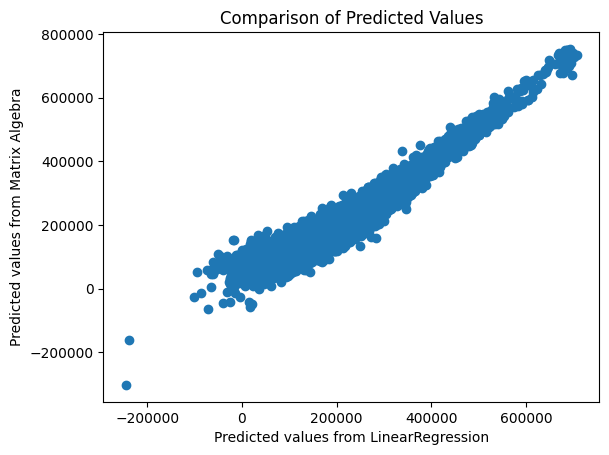

In [50]:
plt.scatter(y_pred_reg, y_hat_vec)
plt.xlabel("Predicted values from LinearRegression")
plt.ylabel("Predicted values from Matrix Algebra")
plt.title("Comparison of Predicted Values")
plt.show()

In [51]:
y_pred_reg_list

[107590.93882877193,
 68409.4116390245,
 305720.19667459186,
 191397.21730050677,
 33264.806686765514,
 200776.28483633883,
 203883.09973578155,
 290534.3097941661,
 115700.86873474298,
 267204.9635256957,
 127749.48679858586,
 104493.94218753744,
 146278.30189305823,
 194170.75740568386,
 217612.56615262944,
 318743.94045239827,
 32064.435910416767,
 196737.3586543901,
 263343.07751628617,
 402989.8794248486,
 239574.01587972743,
 115943.7875818098,
 271321.3414294543,
 150665.77004193095,
 153836.97616189066,
 184946.95075932844,
 239648.29157665325,
 183551.96818418195,
 228070.04928564234,
 179880.12997334683,
 281487.6284512612,
 302027.66973625775,
 168138.46888109948,
 240941.74420512887,
 157135.50124113308,
 317769.0649616164,
 304603.4997711205,
 233676.71160938265,
 162186.39638828812,
 126383.60213779891,
 252789.33609634126,
 233172.84555367706,
 172467.98087202292,
 215752.8734157551,
 108071.20452736132,
 141750.31605670974,
 426811.7904854673,
 197961.31395067833,
 2853

In [53]:
y_hat_list

[111296.12259572624,
 74460.34045491263,
 282238.67763614503,
 203927.60508586874,
 40799.894194309636,
 194956.8431585676,
 205572.88886744616,
 327002.0076350377,
 105956.77212545183,
 282997.1525102604,
 127944.1793191441,
 138065.4124611959,
 136784.96736287966,
 181323.43252944946,
 188419.61145992798,
 333585.45138429693,
 13242.879650594128,
 190382.45099096315,
 232202.91868287793,
 409868.31142126455,
 262554.3202617366,
 125580.74865809316,
 277774.47898746596,
 140306.58270887457,
 183919.43357400983,
 140380.88506570557,
 253489.43337793657,
 147496.30572586204,
 199884.75985818234,
 195958.59273343816,
 296003.94745779515,
 301415.9654813791,
 173477.68403725018,
 181033.77376697134,
 159808.0584930095,
 283832.137900496,
 272100.5205281593,
 232287.3046259341,
 189905.50429753418,
 125151.3520432418,
 223455.48174938865,
 204103.43764770136,
 166807.36217779084,
 212123.4148428022,
 107540.64786550686,
 169729.50838115436,
 406804.3813708825,
 182866.09408513774,
 290266.